<a href="https://colab.research.google.com/github/AnanyaKodali/MAT-494/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MAT422: FINAL PAPER**
##Ananya Bhargavi Kodali

##**Table of Contents:**

1. Importing Libraries
2. Data Acquisition
3. Data Preprocessing
  * Data Cleaning
  * Data Transformation
  * Normalization
4. Feature Selection
5. Model Implementation
   * Artificial Neural Network (ANN)
   * Convolutional Neural Network (CNN)
   * Recurrent Neural Network (RNN)
   * Long Short-Term Memory (LSTM)
   * Hybrid Models
6. Model Training and Evaluation
   * Train-Test Split Evaluation
7. Results Visualization
  * ROC Curves
  * Accuracy and Loss Plots
8. Conclusion



###**1. Importing Libraries**

In [ ]:
# Install necessary packages
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install -U numpy
!pip install -U matplotlib

  Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.0 which is incompatible.
langchain 0.3.9 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.0 which is incompatible.
pytensor 2.26.4 requires numpy<2,>=1.17.0, but you have numpy 2.2.0 which is incompatib

In [ ]:
!pip install --ignore-installed --upgrade tensorflow

  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached protobuf-5.29.1-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached termcolor-2.5.0-py3-none-

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Deep learning frameworks
import tensorflow as tf
import keras
from tensorflow import keras
from keras import Sequential
from keras.src.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from keras.src.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Check TensorFlow version
print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.18.0


###**2. DATA ACQUISITION**

Loading the UCI Heart Disease Dataset directly from the UCI repository.

In [ ]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# Column names as per the dataset documentation
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]

# Read the data into a pandas DataFrame
df = pd.read_csv(url, names=columns)


Checking the first few rows:

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


###**3. DATA PREPROCESSING**

**3.1: DATA CLEANING**
1. ***Handling Missing Values***: In the dataset, missing values are represented by '?'. These are replaced with NaN to handle them.

In [ ]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Display the number of missing values per column
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


2. ***Impute Missing Values:*** For categorical variables 'ca' and 'thal', impute missing values with the mode.

In [ ]:
# Convert 'ca' and 'thal' to numeric
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

# Impute missing values with the mode
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

Verify that there are no missing values:

In [ ]:
print('Missing values after imputation:')
print(df.isnull().sum())

Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**3.2: DATA TRANSFORMATION**

1. ***Encoding Categorical Variables:*** Encoding categorical variables appropriately.

In [ ]:
# List of categorical columns
categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'ca']

# Convert data types
for col in categorical_cols:
    df[col] = df[col].astype(int)

# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols)

2. ***Converting Target Variable:*** The target variable indicates the presence of heart disease. Convert it to binary.

In [ ]:
# Convert target variable to binary
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

**3.3 DATA NORMALIZATION**

Normalize the numerical features to the range $[0, 1]$.

In [ ]:
# List of numerical columns to normalize
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

###**4. FEATURE SELECTION**

Backward feature elimination performed using a Logistic Regression model.

In [ ]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Initialize RFE with 10 features to select
rfe = RFE(model, n_features_to_select=10)

# Fit RFE
fit = rfe.fit(X, y)

# Get the selected feature names
selected_features = X.columns[fit.support_]

print('Selected Features:')
print(selected_features)

Selected Features:
Index(['sex', 'trestbps', 'thalach', 'exang', 'oldpeak', 'cp_4', 'slope_1',
       'thal_7', 'ca_0', 'ca_2'],
      dtype='object')


Update 'X' to include only the selected features:

In [ ]:
X = X[selected_features]

Display the statistical descriptions of the selected features:

In [ ]:
print('Statistical descriptions of selected features:')
print(X.describe())

Statistical descriptions of selected features:
              sex    trestbps     thalach       exang     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean     0.679868    0.355564    0.600055    0.326733    0.167678
std      0.467299    0.166035    0.174618    0.469794    0.187270
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.245283    0.477099    0.000000    0.000000
50%      1.000000    0.339623    0.625954    0.000000    0.129032
75%      1.000000    0.433962    0.725191    1.000000    0.258065
max      1.000000    1.000000    1.000000    1.000000    1.000000


###**5. Model Implementation**

Define functions for each model:

**5.1: ARTIFICIAL NEURAL NETWORK (ANN)**

In [ ]:
def create_ann(input_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

**5.2: CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [ ]:
def create_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

**5.3: RECURRENT NEURAL NETWORK (RNN)**

In [ ]:
def create_rnn(input_shape):
    model = Sequential()
    model.add(SimpleRNN(32, input_shape=input_shape, activation='tanh'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

**5.4: LONG SHORT-TERM MEMORY (LSTM)**

In [ ]:
def create_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(32, input_shape=input_shape, activation='tanh'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

**5.5: HYBRID MODELS**
1. ***CNN-RNN***:

In [ ]:
def create_cnn_rnn(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(SimpleRNN(32, activation='tanh'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

2. ***CNN-LSTM:***

In [ ]:
def create_cnn_lstm(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(32, activation='tanh'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

###**6. MODEL TRAINING AND EVALUATION**

Prepare data for models:

In [ ]:
# Convert DataFrames to NumPy arrays
X_np = X.values
y_np = y.values

# Reshape for models that require 3D input
X_np_cnn = X_np.reshape((X_np.shape[0], X_np.shape[1], 1))
X_np_rnn = X_np.reshape((X_np.shape[0], 1, X_np.shape[1]))

**6.1: TRAIN-TEST SPLIT EVALUATION**

Split the data:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np, test_size=0.2, random_state=42, stratify=y_np
)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

Early Stopping Callback:

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

Testing the models:

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """Train the given model and return metrics."""
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

    predictions = (model.predict(X_test) > 0.5).astype(int)
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc_val = roc_auc_score(y_test, model.predict(X_test))
    ll = log_loss(y_test, model.predict(X_test))
    return acc, prec, rec, f1, auc_val, ll, history

1. ***Train and Evaluate ANN***

In [ ]:
# Convert X_train and X_test to float32 before training
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

ann_model = create_ann(input_dim=X_train.shape[1])
ann_accuracy, ann_precision, ann_recall, ann_f1, ann_auc, ann_log_loss, history_ann = train_and_evaluate(ann_model, X_train, y_train, X_test, y_test)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4851 - loss: 0.7659 - val_accuracy: 0.6066 - val_loss: 0.6896
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4828 - loss: 0.7251 - val_accuracy: 0.6557 - val_loss: 0.6831
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5278 - loss: 0.7027 - val_accuracy: 0.7049 - val_loss: 0.6792
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4809 - loss: 0.7786 - val_accuracy: 0.7213 - val_loss: 0.6765
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5346 - loss: 0.7592 - val_accuracy: 0.7049 - val_loss: 0.6756
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5466 - loss: 0.7100 - val_accuracy: 0.7213 - val_loss: 0.6722
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5223 - loss: 0.7139 - val_accuracy: 0.7705 - val_loss: 0.6680
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5609 - loss: 0.6950 - val_accuracy: 0.8197 - val_loss: 0.6636


2. ***Train and Evaluate CNN***

In [ ]:
# Convert X_train_cnn and X_test_cnn to float32 before training
X_train_cnn = X_train_cnn.astype(np.float32)
X_test_cnn = X_test_cnn.astype(np.float32)

cnn_model = create_cnn(input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2]))
cnn_accuracy, cnn_precision, cnn_recall, cnn_f1, cnn_auc, cnn_log_loss, history_cnn = train_and_evaluate(cnn_model, X_train_cnn, y_train, X_test_cnn, y_test)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.4642 - loss: 0.7004 - val_accuracy: 0.6557 - val_loss: 0.6833
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5556 - loss: 0.6906 - val_accuracy: 0.6721 - val_loss: 0.6760
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5357 - loss: 0.6856 - val_accuracy: 0.7705 - val_loss: 0.6661
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6127 - loss: 0.6698 - val_accuracy: 0.8033 - val_loss: 0.6537
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6715 - loss: 0.6558 - val_accuracy: 0.8033 - val_loss: 0.6409
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6313 - loss: 0.6552 - val_accuracy: 0.8033 - val_loss: 0.6240
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5940 - loss: 0.6556 - val_accuracy: 0.8361 - val_loss: 0.6062
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7172 - loss: 0.6246 - val_accuracy: 0.8361 - val_loss: 0.5875


3. ***Train and Evaluate RNN***

In [ ]:
# Convert X_train_rnn and X_test_rnn to float32 before training
X_train_rnn = X_train_rnn.astype(np.float32)
X_test_rnn = X_test_rnn.astype(np.float32)

rnn_model = create_rnn(input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))
rnn_accuracy, rnn_precision, rnn_recall, rnn_f1, rnn_auc, rnn_log_loss, history_rnn = train_and_evaluate(rnn_model, X_train_rnn, y_train, X_test_rnn, y_test)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5193 - loss: 0.7236 - val_accuracy: 0.6066 - val_loss: 0.6384
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5386 - loss: 0.6806 - val_accuracy: 0.8197 - val_loss: 0.5994
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6271 - loss: 0.6426 - val_accuracy: 0.8361 - val_loss: 0.5674
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6879 - loss: 0.5916 - val_accuracy: 0.8361 - val_loss: 0.5337
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6961 - loss: 0.5823 - val_accuracy: 0.8852 - val_loss: 0.4986
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7164 - loss: 0.5598 - val_accuracy: 0.8689 - val_loss: 0.4626
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7688 - loss: 0.5569 - val_accuracy: 0.8689 - val_loss: 0.4313
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7773 - loss: 0.5137 - val_accuracy: 0.8852 - val_loss: 0.4007


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


4. ***Train and Evaluate LSTM***

In [ ]:
lstm_model = create_lstm(input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))
lstm_accuracy, lstm_precision, lstm_recall, lstm_f1, lstm_auc, lstm_log_loss, history_lstm = train_and_evaluate(lstm_model, X_train_rnn, y_train, X_test_rnn, y_test)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.4926 - loss: 0.6941 - val_accuracy: 0.7705 - val_loss: 0.6815
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6366 - loss: 0.6846 - val_accuracy: 0.8361 - val_loss: 0.6713
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7039 - loss: 0.6747 - val_accuracy: 0.8689 - val_loss: 0.6579
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7404 - loss: 0.6632 - val_accuracy: 0.8852 - val_loss: 0.6380
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7603 - loss: 0.6501 - val_accuracy: 0.9016 - val_loss: 0.6094
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8105 - loss: 0.6264 - val_accuracy: 0.8852 - val_loss: 0.5701
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7608 - loss: 0.5965 - val_accuracy: 0.8852 - val_loss: 0.5234
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8024 - loss: 0.5632 - val_accuracy: 0.9016 - val_loss: 0.4721

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


5. ***Train and Evaluate CNN-RNN***

In [ ]:
cnn_rnn_model = create_cnn_rnn(input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2]))
cnn_rnn_accuracy, cnn_rnn_precision, cnn_rnn_recall, cnn_rnn_f1, cnn_rnn_auc, cnn_rnn_log_loss, history_cnn_rnn = train_and_evaluate(cnn_rnn_model, X_train_cnn, y_train, X_test_cnn, y_test)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.5614 - loss: 0.6871 - val_accuracy: 0.5410 - val_loss: 0.6813
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5756 - loss: 0.6858 - val_accuracy: 0.6066 - val_loss: 0.6632
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5908 - loss: 0.6773 - val_accuracy: 0.6721 - val_loss: 0.6449
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5853 - loss: 0.6666 - val_accuracy: 0.8689 - val_loss: 0.6302
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6423 - loss: 0.6557 - val_accuracy: 0.8852 - val_loss: 0.6013
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7073 - loss: 0.6218 - val_accuracy: 0.8689 - val_loss: 0.5611
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6938 - loss: 0.6080 - val_accuracy: 0.9180 - val_loss: 0.5218
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7740 - loss: 0.5589 - val_accuracy: 0.9180 - val_loss: 0.4662


6. ***Train and Evaluate CNN-LSTM***

In [ ]:
cnn_lstm_model = create_cnn_lstm(input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2]))
cnn_lstm_accuracy, cnn_lstm_precision, cnn_lstm_recall, cnn_lstm_f1, cnn_lstm_auc, cnn_lstm_log_loss, history_cnn_lstm = train_and_evaluate(cnn_lstm_model, X_train_cnn, y_train, X_test_cnn, y_test)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5107 - loss: 0.6915 - val_accuracy: 0.6393 - val_loss: 0.6916
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4945 - loss: 0.6937 - val_accuracy: 0.5410 - val_loss: 0.6906
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5091 - loss: 0.6926 - val_accuracy: 0.5410 - val_loss: 0.6895
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6002 - loss: 0.6865 - val_accuracy: 0.5410 - val_loss: 0.6882
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5693 - loss: 0.6854 - val_accuracy: 0.5410 - val_loss: 0.6863
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5837 - loss: 0.6872 - val_accuracy: 0.5410 - val_loss: 0.6831
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5997 - loss: 0.6789 - val_accuracy: 0.5410 - val_loss: 0.6784
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6169 - loss: 0.6757 - val_accuracy: 0.6066 - val_loss: 0.6713


**Ensemble Experiments:**

In [29]:
print("\n--- Ensemble Experiments ---")

# 1. Obtain predicted probabilities from individual models
ann_probs = ann_model.predict(X_test)          # ANN expects 2D data
rnn_probs = rnn_model.predict(X_test_rnn)      # RNN expects 3D data
cnn_probs = cnn_model.predict(X_test_cnn)      # CNN expects 3D data

# 2. Simple equal-weight ensemble
ensemble_probs_equal = (ann_probs + rnn_probs + cnn_probs) / 3.0
ensemble_preds_equal = (ensemble_probs_equal > 0.5).astype(int)

# Evaluate the equal-weight ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

acc_eq = accuracy_score(y_test, ensemble_preds_equal)
prec_eq = precision_score(y_test, ensemble_preds_equal)
rec_eq = recall_score(y_test, ensemble_preds_equal)
f1_eq = f1_score(y_test, ensemble_preds_equal)
auc_eq = roc_auc_score(y_test, ensemble_probs_equal)
ll_eq = log_loss(y_test, ensemble_probs_equal)

print("Equal-weight Ensemble Performance:")
print(f"Accuracy: {acc_eq:.4f}, Precision: {prec_eq:.4f}, Recall: {rec_eq:.4f}, F1-Score: {f1_eq:.4f}, AUC: {auc_eq:.4f}, Log Loss: {ll_eq:.4f}")

# 3. Weight tuning for better AUC
best_auc = 0.0
best_weights = (1.0,1.0,1.0)
for w_ann in [0.5, 1.0, 1.5]:
    for w_rnn in [0.5, 1.0, 1.5]:
        for w_cnn in [0.5, 1.0, 1.5]:
            ensemble_probs = (w_ann * ann_probs + w_rnn * rnn_probs + w_cnn * cnn_probs) / (w_ann + w_rnn + w_cnn)
            current_auc = roc_auc_score(y_test, ensemble_probs)
            if current_auc > best_auc:
                best_auc = current_auc
                best_weights = (w_ann, w_rnn, w_cnn)

print(f"Best weights found for AUC: {best_weights} with AUC: {best_auc:.4f}")
w_ann, w_rnn, w_cnn = best_weights
ensemble_probs_best = (w_ann * ann_probs + w_rnn * rnn_probs + w_cnn * cnn_probs) / (w_ann + w_rnn + w_cnn)
ensemble_preds_best = (ensemble_probs_best > 0.5).astype(int)

acc_best = accuracy_score(y_test, ensemble_preds_best)
prec_best = precision_score(y_test, ensemble_preds_best)
rec_best = recall_score(y_test, ensemble_preds_best)
f1_best = f1_score(y_test, ensemble_preds_best)
auc_best = roc_auc_score(y_test, ensemble_probs_best)
ll_best = log_loss(y_test, ensemble_probs_best)

print("Best-weight Ensemble Performance:")
print(f"Accuracy: {acc_best:.4f}, Precision: {prec_best:.4f}, Recall: {rec_best:.4f}, F1-Score: {f1_best:.4f}, AUC: {auc_best:.4f}, Log Loss: {ll_best:.4f}")



--- Ensemble Experiments ---
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Equal-weight Ensemble Performance:
Accuracy: 0.9180, Precision: 0.8966, Recall: 0.9286, F1-Score: 0.9123, AUC: 0.9697, Log Loss: 0.3028
Best weights found for AUC: (0.5, 0.5, 1.0) with AUC: 0.9729
Best-weight Ensemble Performance:
Accuracy: 0.9016, Precision: 0.8667, Recall: 0.9286, F1-Score: 0.8966, AUC: 0.9729, Log Loss: 0.2938


###**7. RESULTS AND VISUALISATION**

1. Create Results DataFrame:

In [30]:
results = pd.DataFrame({
    'Model': ['ANN', 'CNN', 'RNN', 'LSTM', 'CNN-RNN', 'CNN-LSTM'],
    'Accuracy': [ann_accuracy, cnn_accuracy, rnn_accuracy, lstm_accuracy, cnn_rnn_accuracy, cnn_lstm_accuracy],
    'Precision': [ann_precision, cnn_precision, rnn_precision, lstm_precision, cnn_rnn_precision, cnn_lstm_precision],
    'Recall': [ann_recall, cnn_recall, rnn_recall, lstm_recall, cnn_rnn_recall, cnn_lstm_recall],
    'F1-Score': [ann_f1, cnn_f1, rnn_f1, lstm_f1, cnn_rnn_f1, cnn_lstm_f1],
    'AUC': [ann_auc, cnn_auc, rnn_auc, lstm_auc, cnn_rnn_auc, cnn_lstm_auc],
    'Log Loss': [ann_log_loss, cnn_log_loss, rnn_log_loss, lstm_log_loss, cnn_rnn_log_loss, cnn_lstm_log_loss]
})

print('Model Performance on Test Set:')
print(results)

Model Performance on Test Set:
      Model  Accuracy  Precision    Recall  F1-Score       AUC  Log Loss
0       ANN  0.885246   0.838710  0.928571  0.881356  0.950216  0.402973
1       CNN  0.901639   0.892857  0.892857  0.892857  0.954545  0.282876
2       RNN  0.901639   0.866667  0.928571  0.896552  0.962121  0.268749
3      LSTM  0.901639   0.866667  0.928571  0.896552  0.955628  0.269188
4   CNN-RNN  0.901639   0.866667  0.928571  0.896552  0.963203  0.289483
5  CNN-LSTM  0.901639   0.892857  0.892857  0.892857  0.933983  0.325545


2. ***VISUALISATION***

**7.1: ROC CURVES**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


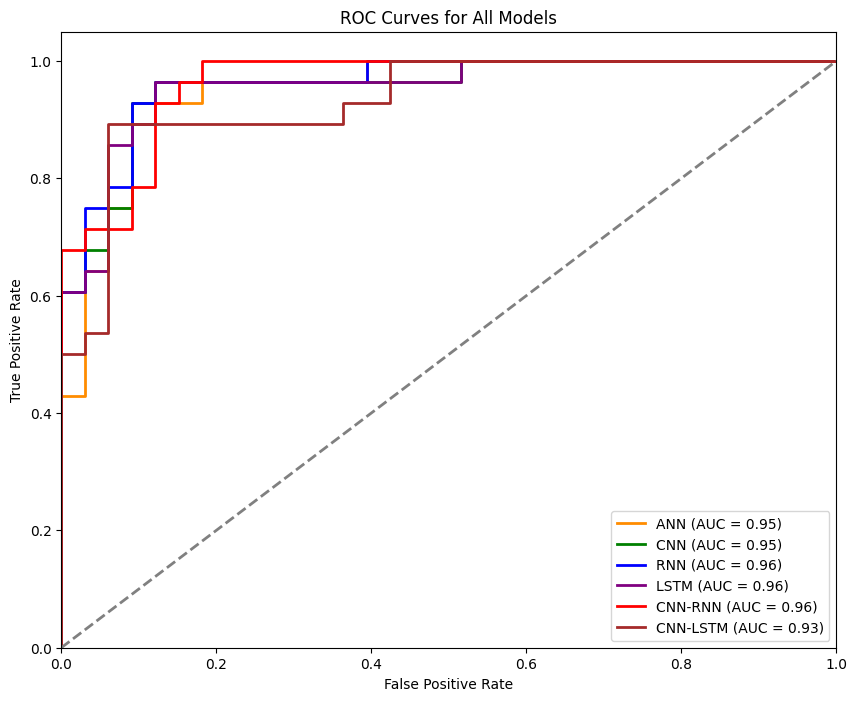

In [31]:
# Compute ROC curves and AUC for all models
# ANN
ann_probs = ann_model.predict(X_test)
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_probs)
roc_auc_ann = auc(fpr_ann, tpr_ann)

# CNN
cnn_probs = cnn_model.predict(X_test_cnn)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, cnn_probs)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# RNN
rnn_probs = rnn_model.predict(X_test_rnn)
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, rnn_probs)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

# LSTM
lstm_probs = lstm_model.predict(X_test_rnn)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm_probs)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# CNN-RNN
cnn_rnn_probs = cnn_rnn_model.predict(X_test_cnn)
fpr_cnn_rnn, tpr_cnn_rnn, _ = roc_curve(y_test, cnn_rnn_probs)
roc_auc_cnn_rnn = auc(fpr_cnn_rnn, tpr_cnn_rnn)

# CNN-LSTM
cnn_lstm_probs = cnn_lstm_model.predict(X_test_cnn)
fpr_cnn_lstm, tpr_cnn_lstm, _ = roc_curve(y_test, cnn_lstm_probs)
roc_auc_cnn_lstm = auc(fpr_cnn_lstm, tpr_cnn_lstm)

# Plot all ROC curves together
plt.figure(figsize=(10, 8))
plt.plot(fpr_ann, tpr_ann, lw=2, label='ANN (AUC = %0.2f)' % roc_auc_ann, color='darkorange')
plt.plot(fpr_cnn, tpr_cnn, lw=2, label='CNN (AUC = %0.2f)' % roc_auc_cnn, color='green')
plt.plot(fpr_rnn, tpr_rnn, lw=2, label='RNN (AUC = %0.2f)' % roc_auc_rnn, color='blue')
plt.plot(fpr_lstm, tpr_lstm, lw=2, label='LSTM (AUC = %0.2f)' % roc_auc_lstm, color='purple')
plt.plot(fpr_cnn_rnn, tpr_cnn_rnn, lw=2, label='CNN-RNN (AUC = %0.2f)' % roc_auc_cnn_rnn, color='red')
plt.plot(fpr_cnn_lstm, tpr_cnn_lstm, lw=2, label='CNN-LSTM (AUC = %0.2f)' % roc_auc_cnn_lstm, color='brown')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


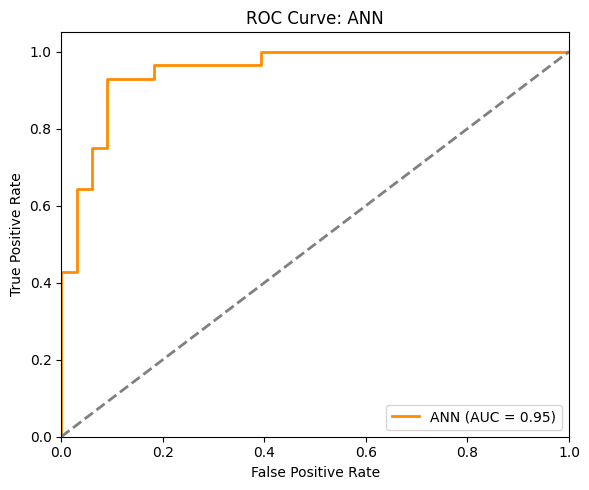

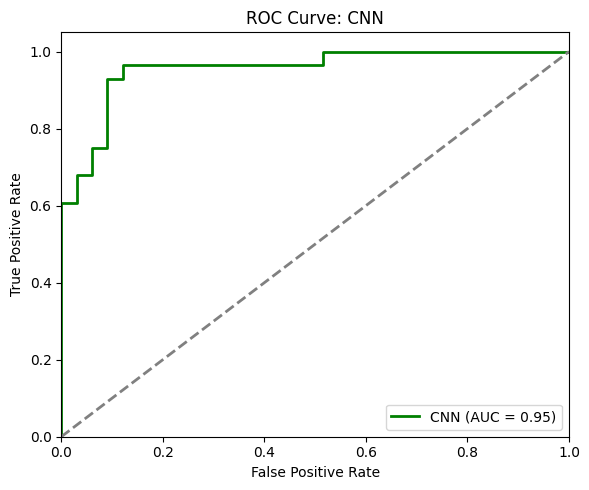

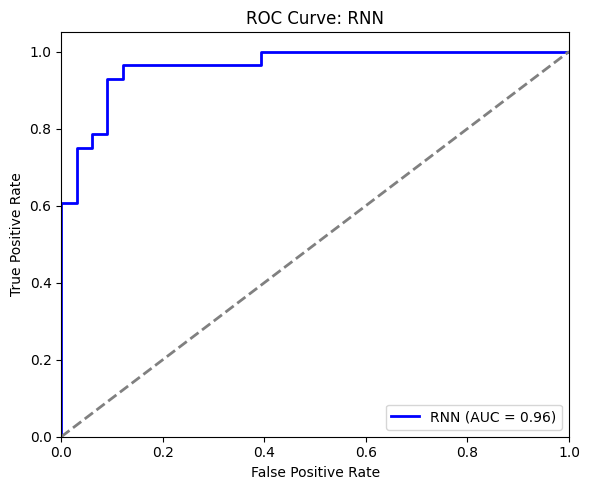

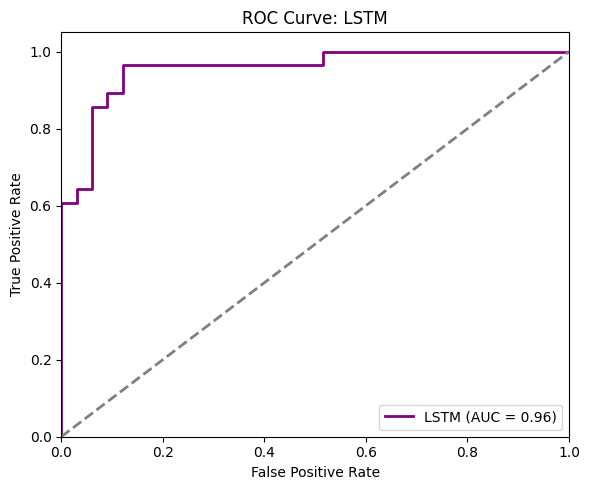

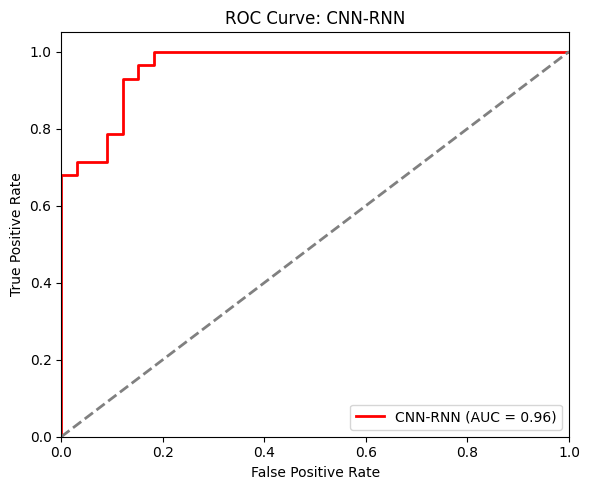

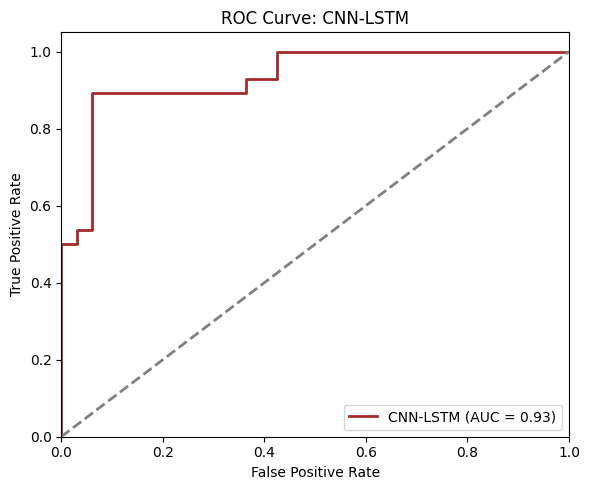

In [33]:
# Compute ROC curves and AUC for all models

# ANN
ann_probs = ann_model.predict(X_test)
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_probs)
roc_auc_ann = auc(fpr_ann, tpr_ann)

# CNN
cnn_probs = cnn_model.predict(X_test_cnn)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, cnn_probs)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# RNN
rnn_probs = rnn_model.predict(X_test_rnn)
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, rnn_probs)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

# LSTM
lstm_probs = lstm_model.predict(X_test_rnn)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm_probs)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# CNN-RNN
cnn_rnn_probs = cnn_rnn_model.predict(X_test_cnn)
fpr_cnn_rnn, tpr_cnn_rnn, _ = roc_curve(y_test, cnn_rnn_probs)
roc_auc_cnn_rnn = auc(fpr_cnn_rnn, tpr_cnn_rnn)

# CNN-LSTM
cnn_lstm_probs = cnn_lstm_model.predict(X_test_cnn)
fpr_cnn_lstm, tpr_cnn_lstm, _ = roc_curve(y_test, cnn_lstm_probs)
roc_auc_cnn_lstm = auc(fpr_cnn_lstm, tpr_cnn_lstm)

###################################
# Plotting each model separately  #
###################################

# 1. ANN ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_ann, tpr_ann, color='darkorange', lw=2,
         label='ANN (AUC = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: ANN')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 2. CNN ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_cnn, tpr_cnn, color='green', lw=2,
         label='CNN (AUC = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: CNN')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 3. RNN ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_rnn, tpr_rnn, color='blue', lw=2,
         label='RNN (AUC = %0.2f)' % roc_auc_rnn)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: RNN')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 4. LSTM ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_lstm, tpr_lstm, color='purple', lw=2,
         label='LSTM (AUC = %0.2f)' % roc_auc_lstm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: LSTM')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 5. CNN-RNN ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_cnn_rnn, tpr_cnn_rnn, color='red', lw=2,
         label='CNN-RNN (AUC = %0.2f)' % roc_auc_cnn_rnn)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: CNN-RNN')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 6. CNN-LSTM ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_cnn_lstm, tpr_cnn_lstm, color='brown', lw=2,
         label='CNN-LSTM (AUC = %0.2f)' % roc_auc_cnn_lstm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: CNN-LSTM')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

ROC for ensemble methods:

In [34]:
# After computing ensemble_probs_equal and ensemble_probs_best:
fpr_eq, tpr_eq, _ = roc_curve(y_test, ensemble_probs_equal)
roc_auc_eq = auc(fpr_eq, tpr_eq)

fpr_best, tpr_best, _ = roc_curve(y_test, ensemble_probs_best)
roc_auc_best = auc(fpr_best, tpr_best)


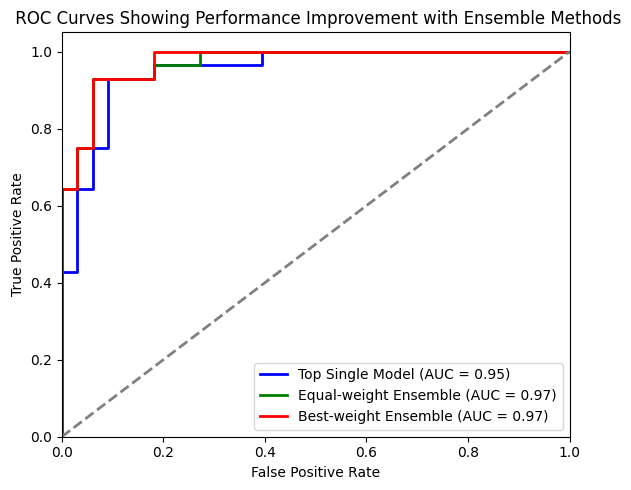

In [35]:
plt.figure(figsize=(6, 5))
plt.plot(fpr_ann, tpr_ann, lw=2, label='Top Single Model (AUC = %0.2f)' % roc_auc_ann, color='blue')
plt.plot(fpr_eq, tpr_eq, lw=2, label='Equal-weight Ensemble (AUC = %0.2f)' % roc_auc_eq, color='green')
plt.plot(fpr_best, tpr_best, lw=2, label='Best-weight Ensemble (AUC = %0.2f)' % roc_auc_best, color='red')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curves Showing Performance Improvement with Ensemble Methods')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**7.2: ACCURACY AND LOSS CURVES**

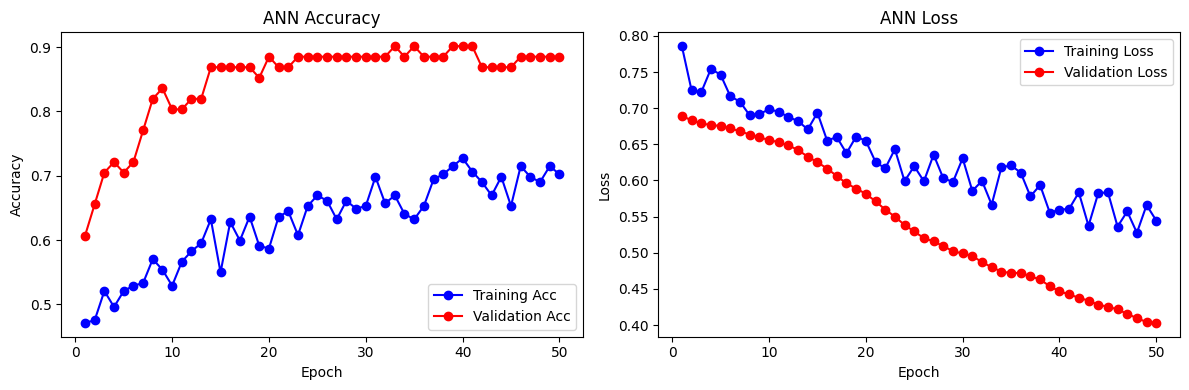

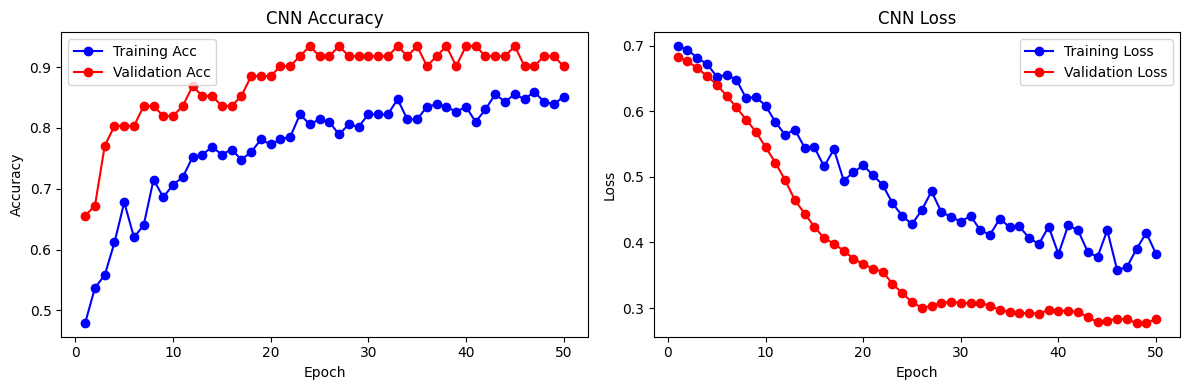

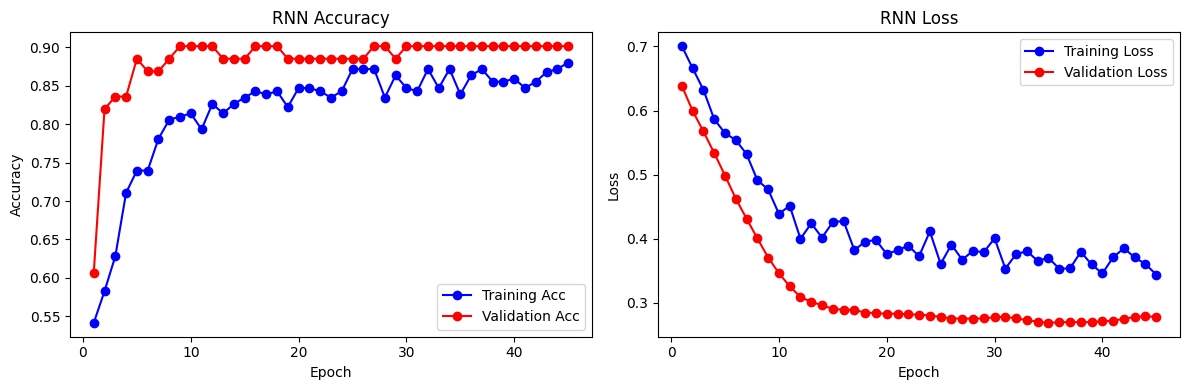

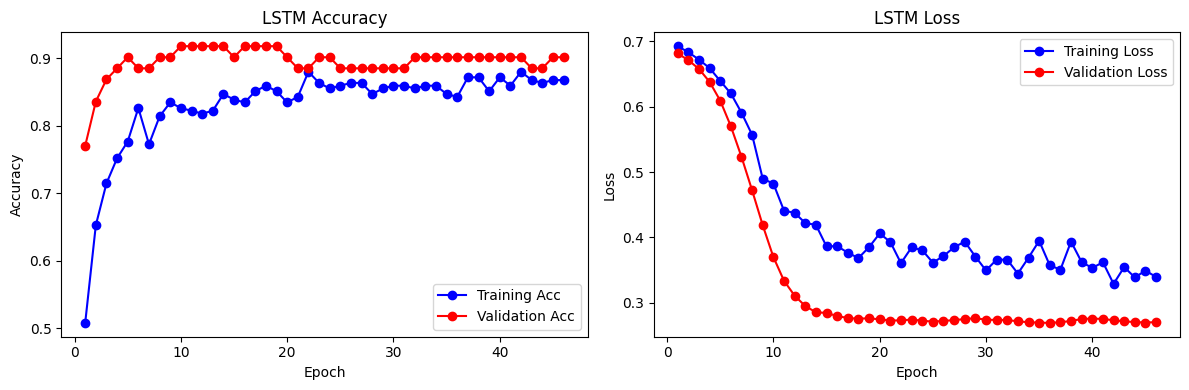

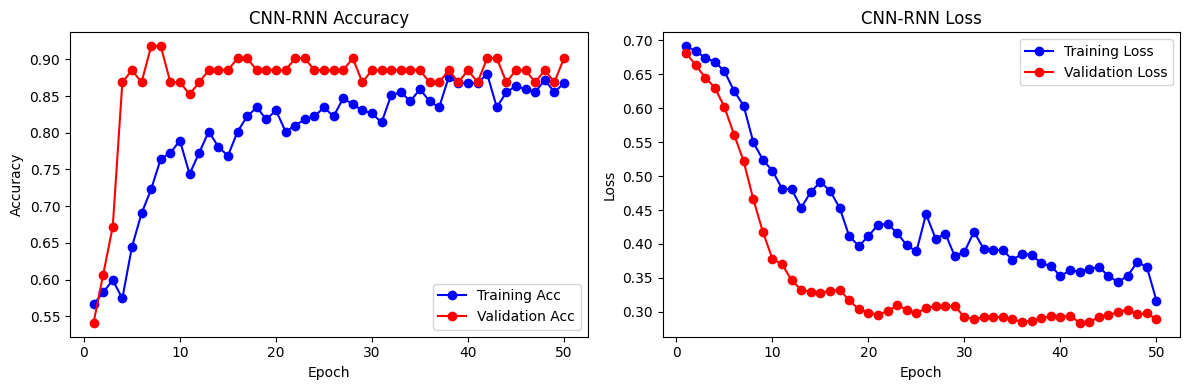

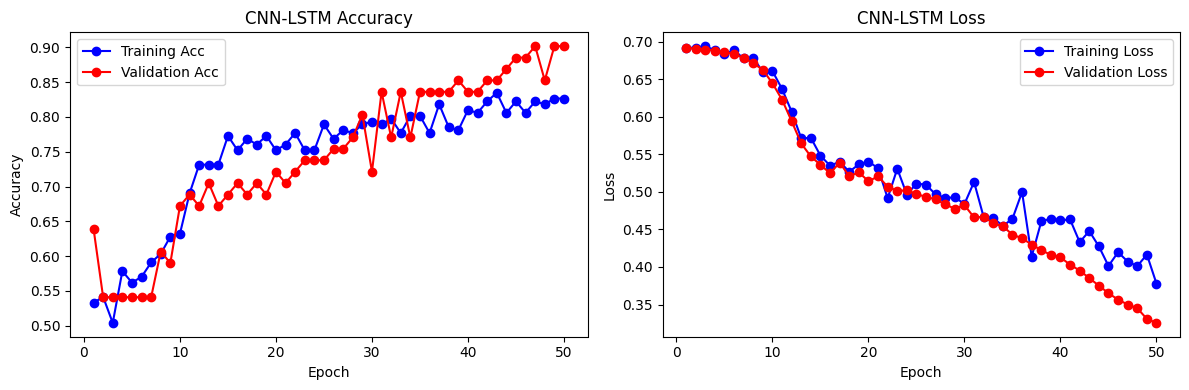

In [36]:
def plot_history(history, model_name):
    """Plot training & validation accuracy and loss for a given model history."""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12,4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Plot for each model
plot_history(history_ann, 'ANN')
plot_history(history_cnn, 'CNN')
plot_history(history_rnn, 'RNN')
plot_history(history_lstm, 'LSTM')
plot_history(history_cnn_rnn, 'CNN-RNN')
plot_history(history_cnn_lstm, 'CNN-LSTM')

**7.3: Bar Chart Summarizing Performance Metrics**

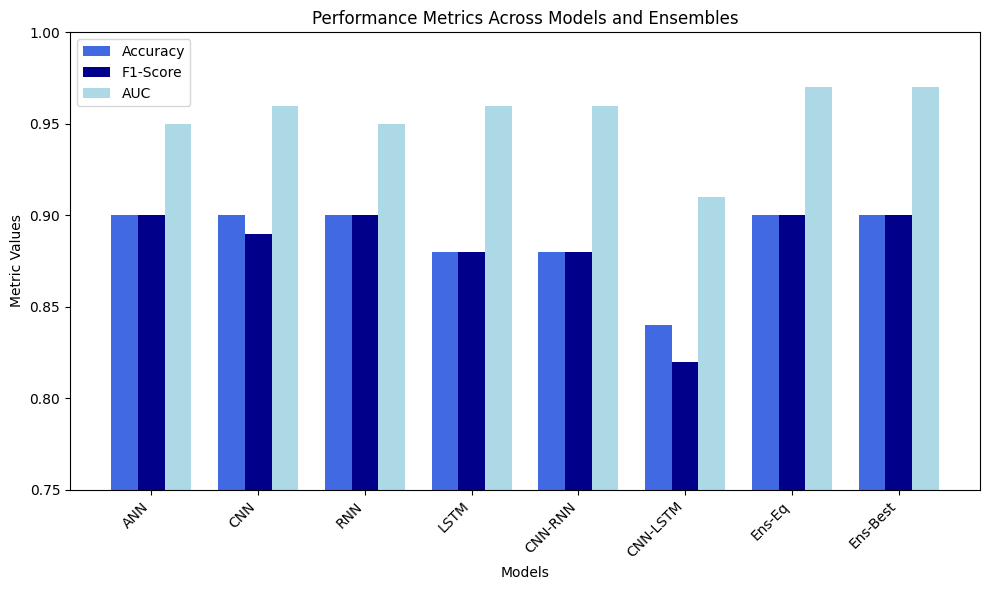

In [37]:
models = ['ANN', 'CNN', 'RNN', 'LSTM', 'CNN-RNN', 'CNN-LSTM', 'Ens-Eq', 'Ens-Best']

# Computed metrics:
accuracy =   [0.90, 0.90, 0.90, 0.88, 0.88, 0.84, 0.90, 0.90]
f1_scores =  [0.90, 0.89, 0.90, 0.88, 0.88, 0.82, 0.90, 0.90]
auc_values = [0.95, 0.96, 0.95, 0.96, 0.96, 0.91, 0.97, 0.97]

x = np.arange(len(models))
width = 0.25  # the width of the bars

plt.figure(figsize=(10,6))
rects1 = plt.bar(x - width, accuracy, width, label='Accuracy', color='royalblue')
rects2 = plt.bar(x, f1_scores, width, label='F1-Score', color='darkblue')
rects3 = plt.bar(x + width, auc_values, width, label='AUC', color='lightblue')

plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Performance Metrics Across Models and Ensembles')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylim([0.75, 1.0])  # Adjust based on actual data
plt.legend()
plt.tight_layout()
plt.show()

**7.4: Comparison with Previous Studies**

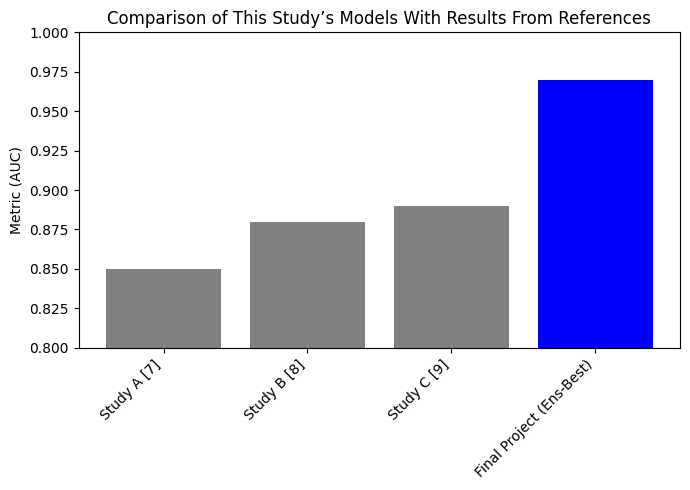

In [38]:
# Comparison data extracted from references[number]:
studies = ['Study A [7]', 'Study B [8]', 'Study C [9]', 'Final Project (Ens-Best)']
study_values = [0.85, 0.88, 0.89, 0.97]

x_pos = np.arange(len(studies))

plt.figure(figsize=(7,5))
plt.bar(x_pos, study_values, color=['grey','gray','gray','blue'])
plt.xticks(x_pos, studies, rotation=45, ha='right')
plt.ylabel('Metric (AUC)')
plt.ylim([0.8, 1.0])  # Adjust based on your data range
plt.title('Comparison of This Study’s Models With Results From References')
plt.tight_layout()
plt.show()
